In [4]:
# Import packages
import os
import zipfile
import subprocess
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil


from Bio import SeqIO
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Errors ignore
import warnings
warnings.filterwarnings('ignore')

In [5]:
path="../data"

In [6]:
train_df = pd.read_csv(path + "/Train.csv")
train_subjects_df = pd.read_csv(path + "/Train_Subjects.csv")
cytokine_profiles_df = pd.read_csv(path + "/cytokine_profiles.csv")

In [8]:
train_df.head()

,filename,SampleType,SubjectID,SampleID
0,ID_LETPJN.mgb,Stool,Subject_BCUNIB,Sample_AFTIWE
1,ID_NTDGIW.mgb,Stool,Subject_UDAXIH,Sample_JQJVNK
2,ID_ZISBMF.mgb,Nasal,Subject_VRKADI,Sample_YJWGWW
3,ID_MDCVXU.mgb,Nasal,Subject_HIFZWD,Sample_VKEHZP
4,ID_SWAMNY.mgb,Stool,Subject_VGLNCV,Sample_NTDTEQ


In [9]:
train_subjects_df.head()

,SubjectID,FPG_Mean,FPG_class,IRIS,SSPG,FPG,SSPG.Date,Class,Gender,Ethnicity,Adj.age,BMI,OGTT,OGTT_Class,Longitudinal.HbA1C.Group,A1C_Class,Family
0,Subject_UDAXIH,1.274432,Diabetes,IS,91.5,131.75,8/7/14,Diabetic,M,C,59.48,21.47,2.245,Diabetes,6. Variable Diabetic-PreDM (n = 8),6.VDP,NaN
1,Subject_NHOSIZ,0.915833,Normal,Unknown,NaN,NaN,NaN,Prediabetic,M,C,61.17,27.06,1.005,Normal,3. PreDM-to-Normal (n = 10),3.PN,NaN
2,Subject_AYZFWN,0.952000,Normal,Unknown,NaN,NaN,NaN,Prediabetic,F,A,56.22,30.61,NaN,NaN,1. Normal (n = 51),1.Normal,NaN
3,Subject_KIEGYK,1.160000,Prediabetes,Unknown,NaN,NaN,NaN,Prediabetic,M,C,49.18,23.22,NaN,NaN,1. Normal (n = 51),1.Normal,NaN
4,Subject_CBVHYJ,0.880000,Normal,Unknown,NaN,NaN,NaN,Control,F,C,46.04,25.26,0.930,Normal,1. Normal (n = 51),1.Normal,NaN


In [10]:
cytokine_profiles_df.head()

,SampleID,Plate,IL17F,FASL,TGFA,MIP1A,SDF1A,IL27,LIF,IL1B,...,ENA78,CHEX1,CHEX2,CHEX3,CHEX4,CollectionDate,CL1,CL2,CL3,CL4
0,Sample_BDRJDQ,INF_P8,184.444488,13.607622,20.587480,57.739170,180.058623,22.069171,39.093968,21.497781,...,141.073916,10469.596344,858.356296,1461.456488,12.783104,12/9/14,D3,Cox/Echo/Rhino Infection (Moraxella catarrhali...,Infection_Middle,Infection
1,Sample_ESYUZA,INF_P8,138.577340,14.046578,14.086170,53.462194,174.431791,22.988720,37.590354,24.301840,...,152.087121,10165.621464,751.848760,1260.148504,12.783104,1/5/15,D30,NaN,Infection_Recovery_Late,Infection_L
2,Sample_CNKYCP,INF_P8,155.655534,17.558222,17.336825,53.462194,164.712717,24.368043,34.081921,19.628409,...,126.914080,10167.570021,704.628671,1198.473264,12.291446,6/17/15,D1,NaN,Infection_Early,Infection
3,Sample_IOOXEU,INF_P8,176.637314,18.436133,26.005238,59.877657,154.482114,26.666915,37.089150,20.563095,...,104.887670,10042.375239,825.826901,1348.960850,14.258077,6/19/15,D3,NaN,Infection_Middle,Infection
4,Sample_KELXIR,INF_P8,182.492695,17.558222,17.336825,63.085389,152.435993,23.908268,38.091559,21.497781,...,145.793861,10012.659746,692.036647,1163.935130,13.766419,7/1/15,D15,NaN,Infection_Recovery_Early,Infection_L


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    2901 non-null   object
 1   SampleType  2901 non-null   object
 2   SubjectID   2901 non-null   object
 3   SampleID    2901 non-null   object
dtypes: object(4)
memory usage: 90.8+ KB


In [12]:
train_subjects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SubjectID                 66 non-null     object 
 1   FPG_Mean                  66 non-null     float64
 2   FPG_class                 66 non-null     object 
 3   IRIS                      66 non-null     object 
 4   SSPG                      44 non-null     float64
 5   FPG                       44 non-null     float64
 6   SSPG.Date                 42 non-null     object 
 7   Class                     66 non-null     object 
 8   Gender                    66 non-null     object 
 9   Ethnicity                 66 non-null     object 
 10  Adj.age                   66 non-null     float64
 11  BMI                       66 non-null     float64
 12  OGTT                      56 non-null     float64
 13  OGTT_Class                61 non-null     object 
 14  Longitudinal

In [13]:
cytokine_profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SampleID        670 non-null    object 
 1   Plate           670 non-null    object 
 2   IL17F           670 non-null    float64
 3   FASL            670 non-null    float64
 4   TGFA            670 non-null    float64
 5   MIP1A           670 non-null    float64
 6   SDF1A           670 non-null    float64
 7   IL27            670 non-null    float64
 8   LIF             670 non-null    float64
 9   IL1B            670 non-null    float64
 10  IL2             670 non-null    float64
 11  IL4             670 non-null    float64
 12  IL5             670 non-null    float64
 13  IP10            670 non-null    float64
 14  IL6             670 non-null    float64
 15  IL7             670 non-null    float64
 16  IL8             670 non-null    float64
 17  IL10            670 non-null    flo

In [15]:
fastq_dir = "../TrainFiles"
all_stats = []

for fname in os.listdir(fastq_dir):
    if not fname.endswith(".fastq"):
        continue

    path = os.path.join(fastq_dir, fname)
    read_lengths = []
    gc_counts = []
    nt_counts = Counter()

    for record in SeqIO.parse(path, "fastq"):
        seq = str(record.seq)
        read_lengths.append(len(seq))
        gc_counts.append(seq.count("G") + seq.count("C"))
        nt_counts.update(seq)

    if read_lengths:
        stats = {
            "file": fname,
            "num_reads": len(read_lengths),
            "avg_read_length": sum(read_lengths) / len(read_lengths),
            "avg_gc_content": sum(gc_counts) / sum(read_lengths),
            "A": nt_counts["A"],
            "T": nt_counts["T"],
            "G": nt_counts["G"],
            "C": nt_counts["C"]
        }
        all_stats.append(stats)

# Convert to DataFrame
df = pd.DataFrame(all_stats)

In [17]:
df.to_csv('../data/train_files.csv', index=False)

In [18]:
df.head()

,file,num_reads,avg_read_length,avg_gc_content,A,T,G,C
0,ID_VWRDDZ.fastq,12662,400.0,0.539149,1364681,969439,1603589,1127091
1,ID_QAOYCC.fastq,283648,124.5,0.520730,7304655,9620387,8886151,9502983
2,ID_XSCLCK.fastq,6096,400.0,0.538157,646309,479848,765262,546981
3,ID_DLVVCV.fastq,2070,124.5,0.545758,48535,68530,67940,72710
4,ID_KFDHBW.fastq,20135,400.0,0.556300,1969891,1603665,2724709,1755735


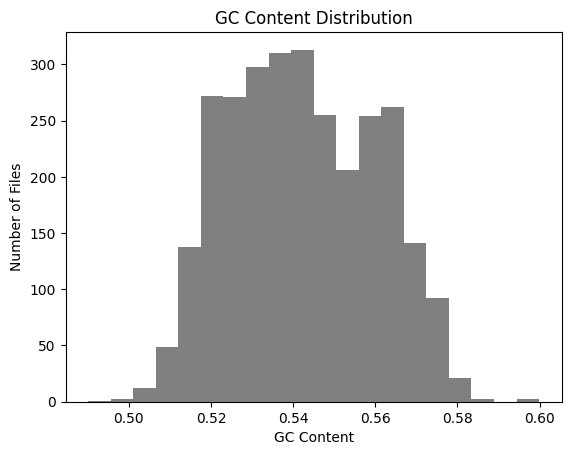

In [19]:
plt.figure()
plt.hist(df["avg_gc_content"], bins=20, color='gray')
plt.title("GC Content Distribution")
plt.xlabel("GC Content")
plt.ylabel("Number of Files")
plt.show()

In [7]:
fastq_dir = "../TrainFiles"
labels = ['Nasal', 'Stool', 'Mouth', 'Skin']

# List all .fastq files in the folder
file_list = [f for f in os.listdir(fastq_dir) if f.endswith(".fastq")]

# Assign a random label to each file
data = {
    "filename": file_list,
    "label": [random.choice(labels) for _ in file_list]
}

# Create the DataFrame
df_labels = pd.DataFrame(data)

# Optional: sort for cleaner viewing
df_labels = df_labels.sort_values("filename").reset_index(drop=True)

# Show the result
df_labels.head()

,filename,label
0,ID_AAFNOT.fastq,Skin
1,ID_AAXPTO.fastq,Nasal
2,ID_AAYKAN.fastq,Mouth
3,ID_ABEZNS.fastq,Nasal
4,ID_ABFFLP.fastq,Mouth


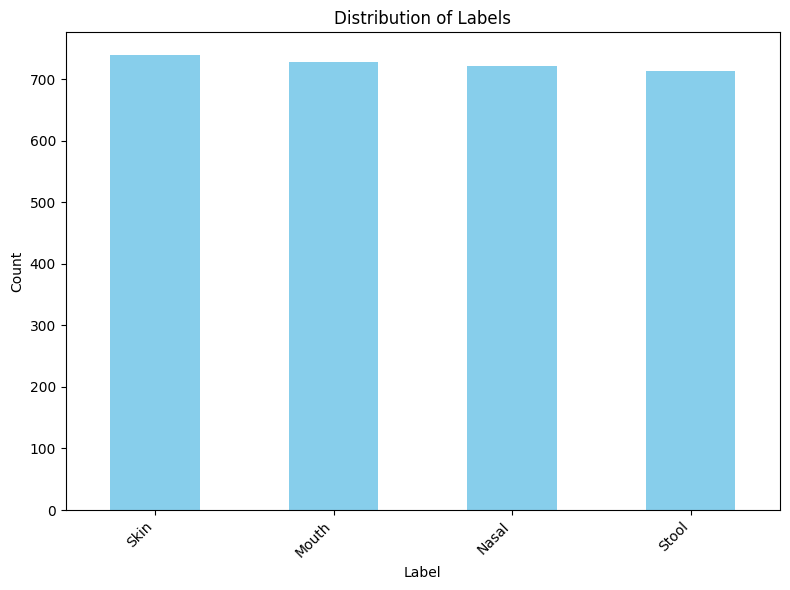

In [26]:
import matplotlib.pyplot as plt
# Count the occurrences of each label
label_counts = df_labels['label'].value_counts()

# Plotting the label counts
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [1]:
def extract_features_from_fastq(path):
    read_lengths = []
    gc_counts = []
    nt_counter = Counter()

    for record in SeqIO.parse(path, "fastq"):
        seq = str(record.seq)
        read_lengths.append(len(seq))
        gc_counts.append(seq.count("G") + seq.count("C"))
        nt_counter.update(seq)

    if not read_lengths:
        return None  # skip empty files

    total_len = sum(read_lengths)
    return {
        "num_reads": len(read_lengths),
        "avg_read_len": total_len / len(read_lengths),
        "gc_content": sum(gc_counts) / total_len,
        "A": nt_counter["A"] / total_len,
        "T": nt_counter["T"] / total_len,
        "G": nt_counter["G"] / total_len,
        "C": nt_counter["C"] / total_len,
    }

In [8]:
train_dir = "../TrainFiles"
train_features = []

for _, row in df_labels.iterrows():
    fpath = os.path.join(train_dir, row["filename"])
    feats = extract_features_from_fastq(fpath)
    if feats:
        feats["filename"] = row["filename"]
        feats["label"] = row["label"]
        train_features.append(feats)

df_train = pd.DataFrame(train_features)

In [9]:
df_train.to_csv('../data/new_train_files.csv', index=False)

In [10]:
# Encode string labels to integers
le = LabelEncoder()
df_train["label_enc"] = le.fit_transform(df_train["label"])

In [11]:
# Define features & target
X = df_train[["num_reads", "avg_read_len", "gc_content", "A", "T", "G", "C"]]
y = df_train["label_enc"]

In [12]:
X.to_csv("X.csv", index = False)
y.to_csv("y.csv", index = False)

In [13]:
# Train/test split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42)

In [14]:
# Train classifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# Evaluate
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Mouth       0.26      0.32      0.29       184
       Nasal       0.31      0.31      0.31       181
        Skin       0.27      0.24      0.26       188
       Stool       0.27      0.24      0.25       173

    accuracy                           0.28       726
   macro avg       0.28      0.28      0.28       726
weighted avg       0.28      0.28      0.28       726



In [17]:
y_pred[0:6]

array([2, 3, 3, 2, 0, 1])

In [18]:
y_val[0:6]

986     0
2502    3
2108    2
923     2
823     1
1878    1
Name: label_enc, dtype: int64